<a href="https://colab.research.google.com/github/economicactivist/DS-Unit-2-Build/blob/master/EDA_LearningAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [0]:
df = pd.read_csv('/content/drive/My Drive/Datasets/Build_2/open_learning_analytics_kaggle.csv')

In [6]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click
0,BBB,2014J,645371,F,East Anglian Region,Lower Than A Level,50-60%,0-35,0,60,N,Fail,464.0,61.0
1,BBB,2013J,577069,F,London Region,HE Qualification,10-20,0-35,0,60,N,Pass,51312.0,1380.0
2,BBB,2014J,630697,F,East Anglian Region,A Level or Equivalent,20-30%,0-35,0,60,N,Pass,651.0,78.0
3,BBB,2014B,2271743,F,Wales,A Level or Equivalent,0-10%,0-35,2,180,Y,Fail,2800.0,206.0
4,AAA,2014J,348807,M,East Midlands Region,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,12628.0,425.0


In [29]:
df.studied_credits.unique()

array([ 60, 180,  90, 120, 325,  75, 150, 240, 270, 130, 330, 300, 165,
       195, 210, 135,  70, 250, 105, 170, 420,  80, 225])

In [31]:
df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'date', 'sum_click'],
      dtype='object')

In [0]:
gendered = df.groupby('gender').final_result.value_counts(normalize=True)

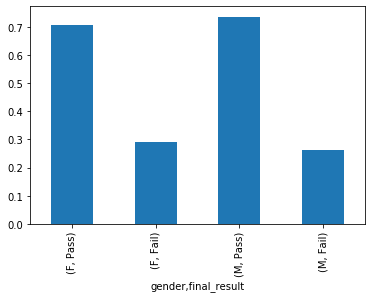

In [9]:
df.groupby('gender').final_result.value_counts(normalize=True).plot(kind="bar")

In [10]:
df.groupby('gender').highest_education.value_counts(normalize=True)

gender  highest_education          
F       A Level or Equivalent          0.451528
        Lower Than A Level             0.409634
        HE Qualification               0.126897
        No Formal quals                0.010119
        Post Graduate Qualification    0.001821
M       A Level or Equivalent          0.454918
        Lower Than A Level             0.336066
        HE Qualification               0.194672
        Post Graduate Qualification    0.009221
        No Formal quals                0.005123
Name: highest_education, dtype: float64

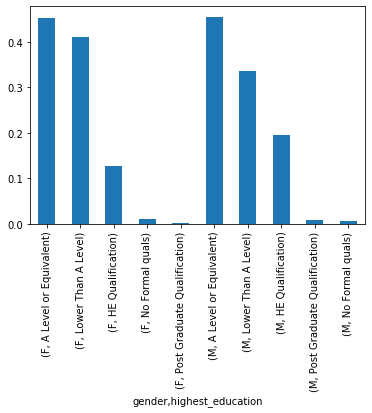

In [11]:
df.groupby('gender').highest_education.value_counts(normalize=True).plot(kind="bar")

In [0]:
z = df.groupby('gender').highest_education.value_counts(normalize=True).unstack().rename_axis(None)

del z.columns.name



In [0]:
z = z.reset_index().rename(columns={'index':'gender'})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4e6f61240>,
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

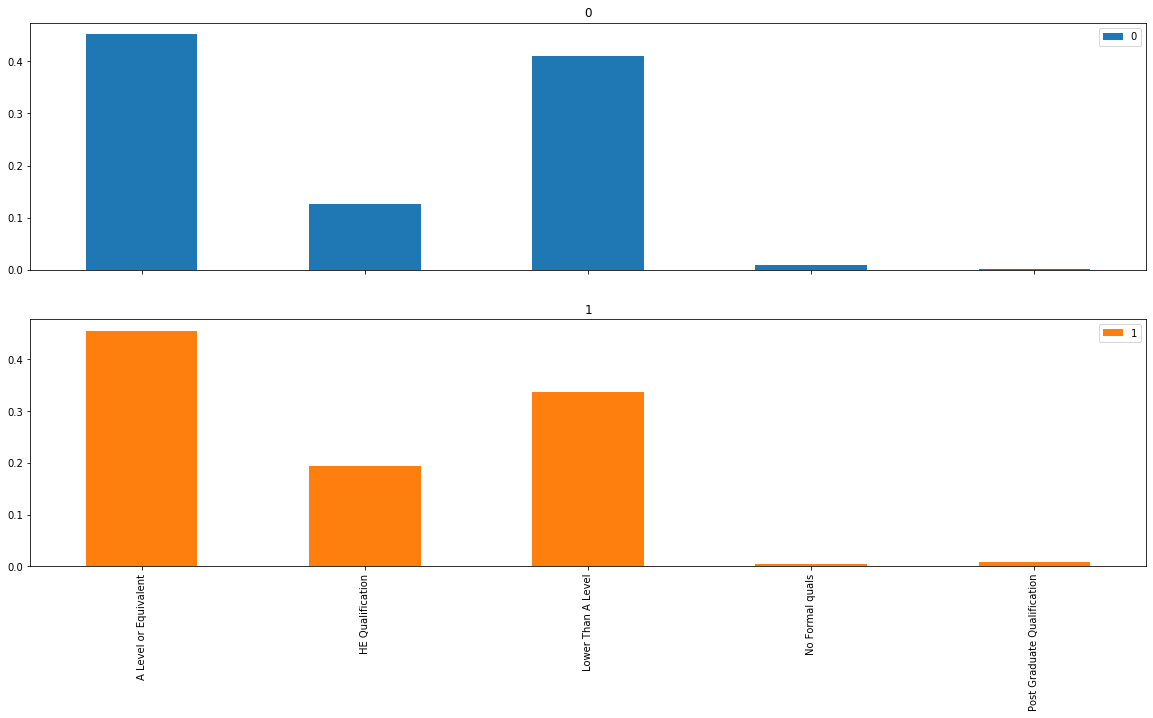

In [14]:

plt.figure(figsize=(20,20))

z.iloc[:,1:].T.plot(kind="bar", subplots=True, figsize=(20,10))

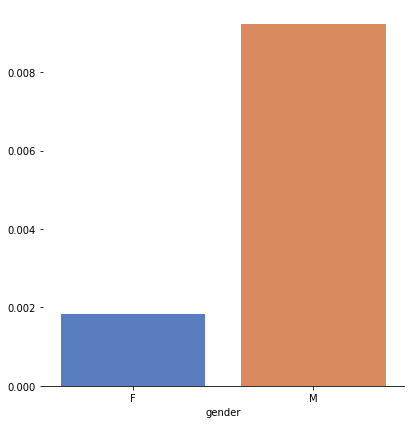

In [15]:
# import seaborn as sns
# sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="gender", y='Post Graduate Qualification',  data=z,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("")

In [16]:
z.columns

Index(['gender', 'A Level or Equivalent', 'HE Qualification',
       'Lower Than A Level', 'No Formal quals', 'Post Graduate Qualification'],
      dtype='object')

In [17]:
z

,gender,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification
0,F,0.451528,0.126897,0.409634,0.010119,0.001821
1,M,0.454918,0.194672,0.336066,0.005123,0.009221


In [0]:
# fig1, ax1 = plt.subplots()
# z.columns.tolist()
# ax1.pie(z, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# # Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')  
# plt.tight_layout()
# plt.show()

In [19]:
df.region.value_counts(normalize=True)

Wales                   0.116106
East Anglian Region     0.110191
Scotland                0.101234
South Region            0.085685
London Region           0.081967
West Midlands Region    0.077573
South West Region       0.074362
South East Region       0.069799
East Midlands Region    0.068954
Yorkshire Region        0.067602
North Western Region    0.067095
Ireland                 0.052729
North Region            0.026703
Name: region, dtype: float64

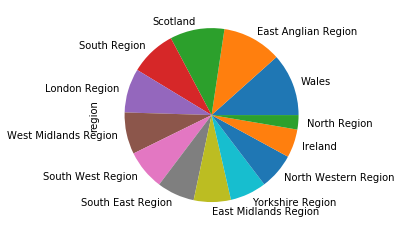

In [20]:
df.region.value_counts(normalize=True).plot(kind="pie")

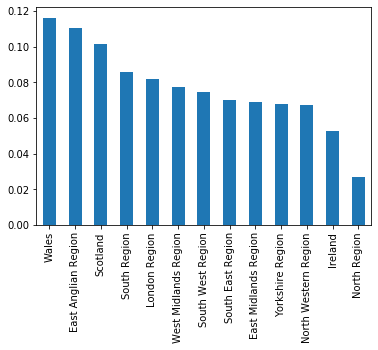

In [21]:
df.region.value_counts(normalize=True).plot(kind="bar")

In [22]:
df.groupby('region').final_result.value_counts(normalize=True)

region                final_result
East Anglian Region   Pass            0.722393
                      Fail            0.277607
East Midlands Region  Pass            0.715686
                      Fail            0.284314
Ireland               Pass            0.753205
                      Fail            0.246795
London Region         Pass            0.624742
                      Fail            0.375258
North Region          Pass            0.689873
                      Fail            0.310127
North Western Region  Pass            0.602015
                      Fail            0.397985
Scotland              Pass            0.717863
                      Fail            0.282137
South East Region     Pass            0.852300
                      Fail            0.147700
South Region          Pass            0.786982
                      Fail            0.213018
South West Region     Pass            0.756818
                      Fail            0.243182
Wales                 Pas

###Come back to this

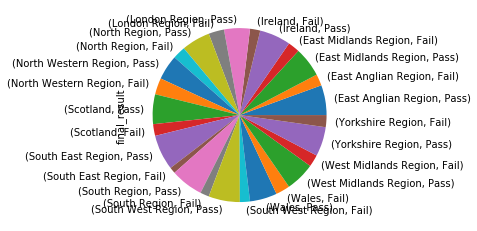

In [23]:
df.groupby('region').final_result.value_counts(normalize=True).plot(kind="pie") 

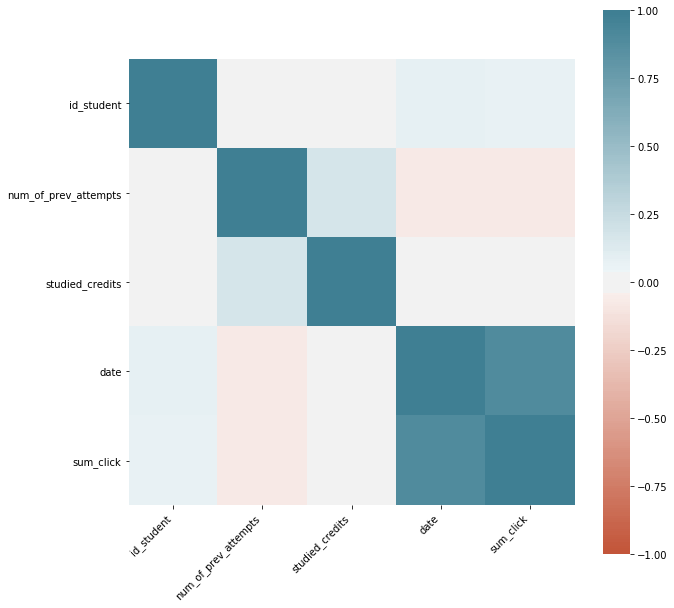

In [24]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [25]:
df.corr()


,id_student,num_of_prev_attempts,studied_credits,date,sum_click
id_student,1.000000,0.001456,-0.004675,0.080400,0.077437
num_of_prev_attempts,0.001456,1.000000,0.177788,-0.077052,-0.076873
studied_credits,-0.004675,0.177788,1.000000,-0.010220,-0.035000
date,0.080400,-0.077052,-0.010220,1.000000,0.890215
sum_click,0.077437,-0.076873,-0.035000,0.890215,1.000000


###No strong correlations between continuous variables except for "date" and "sum_click".  

"date" is the number of days since the start of the module-presentation.
"sum_click" the number of times a student interacts with the material in a day.  Because I have already combined data for each student id, "sum_click" represents a cumulative sum.  "date" was already a cumulative sum, the data is not meaningfully altered in that the ratios between student "date" totals remain the same (thought the individual values are amplified by taking the cumulative of a cumulative total). 

The correlation between "date" and "sum_click" (pearson's r = .89) may be a trivial result of the fact that the longer you have been on a module-presentation, the more opportunities you have had to interact with it (by clicking on different items). 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 14 columns):
code_module             5917 non-null object
code_presentation       5917 non-null object
id_student              5917 non-null int64
gender                  5917 non-null object
region                  5917 non-null object
highest_education       5917 non-null object
imd_band                5917 non-null object
age_band                5917 non-null object
num_of_prev_attempts    5917 non-null int64
studied_credits         5917 non-null int64
disability              5917 non-null object
final_result            5917 non-null object
date                    5917 non-null float64
sum_click               5917 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 647.3+ KB


In [0]:
categorical_data = df.select_dtypes(exclude="number").copy()

In [28]:
#pip install dython #or
#!pip install git+https://github.com/shakedzy/dython.git

import dython.nominal as dynom

ModuleNotFoundError: ignored

In [0]:
fig, ax = plt.subplots(figsize=(8,8))

dynom.associations(categorical_data, theil_u=True, ax=ax) 
#switch theil_u to "True" if you don't want to use Cramer's V


In [0]:
fig, ax = plt.subplots(figsize=(8,8))

dynom.associations(categorical_data, theil_u=False, ax=ax) 

###All categorical associations are below .5, so no strong associations at first glance.  The association between "code_module" and "gender" is relatively high, but this can be explained by a significant gender imbalance in one of the modules.  Specifically, module BBB is around 88% Female. 

It is also interesting to note that socioeconomic level and disability do not appear to be closely associated with a pass or fail. 

In [0]:
df.groupby('code_module').gender.value_counts(normalize=True)

In [0]:
df.query("code_module == 'BBB'").groupby('code_module').gender.value_counts(normalize=True).plot(kind='pie')

In [0]:
df.query("code_module == 'AAA'").groupby('code_module').gender.value_counts(normalize=True).plot(kind='pie')


In [0]:
numerical_data = df.select_dtypes(exclude=object)

In [0]:
numerical_data.info()

In [0]:

"""
#The correlation ratio answers the question:
Given a continuous number, how well can you know to which category it is associated?* 
(Zychlinski, 2018 [paraphrased]
"""

def dataframe_corr_ratio(cat_data,num_data):
  ratio_list = []
  ratio_names = []
  for i in range(len(cat_data.T)):
    for j in range(len(num_data.T)):
      new_ratio = dynom.correlation_ratio(cat_data.iloc[:,i], num_data.iloc[:,j])
      new_name =  num_data.iloc[:,j].name +  " ⟶ " + cat_data.iloc[:,i].name 
      ratio_list.append(new_ratio)
      ratio_names.append(new_name)
  zipped_ratios = list(zip(ratio_names, ratio_list))
  corr_ratio_df = pd.DataFrame(zipped_ratios, columns=["(Asymmetric) Association of Variables", "Ratio"])
  return corr_ratio_df.sort_values("Ratio", ascending=False).nlargest(10, columns="Ratio").reset_index(drop=True)

In [0]:
dataframe_corr_ratio(categorical_data, numerical_data)

###The correlation ratio reveals that the continuous variables concerning

1.   the number days spent on the module-presentation,
2.   the number of clicks in VLE,  and
3.   the student id 

###provide the most information about their association with specific categorical variables.

Regarding id_student's association with age ranges and code_modules, these associations <b>may support not dropping</b> the column even though it has high cardinality. 

[link text](https://)

